<a href="https://colab.research.google.com/github/ploybongkot/Multivariate/blob/main/Chapter3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principle Component Analysis)

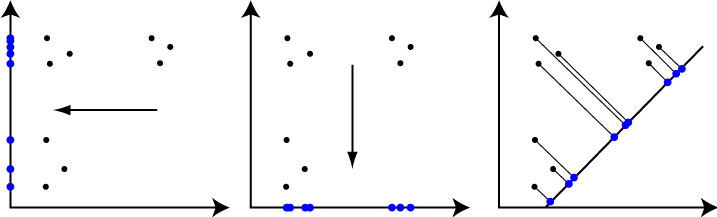

ขั้นตอน 5 ขั้นตอน

Standardizing the Data (ปรับ mean เเละ std ให้มี mean=0 std=1)
Calculating the covariance matrix (หา Covariance matrix ของข้อมูลเรา)
Computing the Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)
Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ eigens ที่จำเป็น)
Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนเเกนใหม่) https://wendynavarrete.com/principal-component-analysis-with-numpy/

Projection ไว้ช่วยลดความซับซ้อน

PCA step by step

In [ ]:
import pandas as pd 

###load data

In [ ]:
example_df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)


In [ ]:
example_df 

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


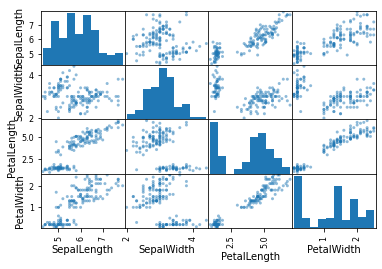

In [ ]:
pd.plotting.scatter_matrix(example_df);

In [ ]:
import numpy as np

In [ ]:
data_matrix = np.array(example_df.iloc[:,:-1]) #สร้างเมทริกซ์
data_matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
data_matrix = data_matrix.T # ทรานสพอร์ท
print(data_matrix.shape)
data_matrix

(4, 150)


array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

# 1.Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)

เพื่อให้เป็นมาตรฐาน

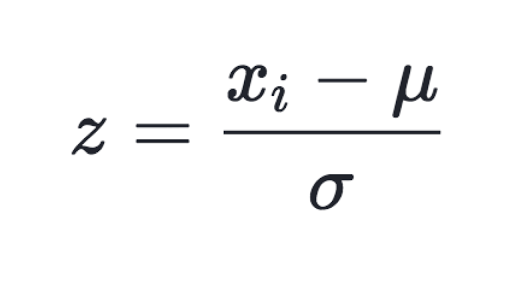

## วิธีซับซ้อน

In [ ]:
meanD = np.mean(data_matrix) # mean ของทั้งเมทริกซ์ ใช้ไม่ได้
meanD

3.4636666666666662

In [ ]:
meanD = np.mean(data_matrix,axis=0) # axis หาในเเนวเเกน 0
meanD

array([2.55 , 2.375, 2.35 , 2.35 , 2.55 , 2.85 , 2.425, 2.525, 2.225,
       2.4  , 2.7  , 2.5  , 2.325, 2.125, 2.8  , 3.   , 2.75 , 2.575,
       2.875, 2.675, 2.675, 2.675, 2.35 , 2.65 , 2.575, 2.45 , 2.6  ,
       2.6  , 2.55 , 2.425, 2.425, 2.675, 2.725, 2.825, 2.4  , 2.4  ,
       2.625, 2.4  , 2.225, 2.55 , 2.525, 2.1  , 2.275, 2.675, 2.8  ,
       2.375, 2.675, 2.35 , 2.675, 2.475, 4.075, 3.9  , 4.1  , 3.275,
       3.85 , 3.575, 3.975, 2.9  , 3.85 , 3.3  , 2.875, 3.65 , 3.3  ,
       3.775, 3.35 , 3.9  , 3.65 , 3.4  , 3.6  , 3.275, 3.925, 3.55 ,
       3.8  , 3.7  , 3.725, 3.85 , 3.95 , 4.1  , 3.725, 3.2  , 3.2  ,
       3.15 , 3.4  , 3.85 , 3.6  , 3.875, 4.   , 3.575, 3.5  , 3.325,
       3.425, 3.775, 3.4  , 2.9  , 3.45 , 3.525, 3.525, 3.675, 2.925,
       3.475, 4.525, 3.875, 4.525, 4.15 , 4.375, 4.825, 3.4  , 4.575,
       4.2  , 4.85 , 4.2  , 4.075, 4.35 , 3.8  , 4.025, 4.3  , 4.2  ,
       5.1  , 4.875, 3.675, 4.525, 3.825, 4.8  , 3.925, 4.45 , 4.55 ,
       3.9  , 3.95 ,

In [ ]:
meanD = np.mean(data_matrix,axis=1)# ได้ mean ทั้งหมด 4 ตัว ใช้อันนี้
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [ ]:
stdD = np.std(data_matrix,axis=1) # การหา std
stdD

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [ ]:
zeromatrix = np.zeros((4,10))# สร้างเมทรกซ์ 0 ที่มี 4เเถว 10 หลัก
zeromatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
zeromatrix-meanD# หลักเเละเเถวไม่เท่ากัน

ValueError: ignored

In [ ]:
onematrix = np.ones((4,10)) # เมทริกซ์ หนึ่ง 4 เเถว 10 หลัก
onematrix

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
zeromatrix - meanD . reshape((4,1))## reshape บังคับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ

array([[-5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333,
        -5.84333333, -5.84333333, -5.84333333, -5.84333333, -5.84333333],
       [-3.054     , -3.054     , -3.054     , -3.054     , -3.054     ,
        -3.054     , -3.054     , -3.054     , -3.054     , -3.054     ],
       [-3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667,
        -3.75866667, -3.75866667, -3.75866667, -3.75866667, -3.75866667],
       [-1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667,
        -1.19866667, -1.19866667, -1.19866667, -1.19866667, -1.19866667]])

####  เลื่อน mean มาที่ 0

In [ ]:
data_matrix_m0 = data_matrix- meanD.reshape((4,1)) # การเลื่อน data มารอบๆเลื่อน mean มาที่ 0
data_matrix_m0

array([[-7.43333333e-01, -9.43333333e-01, -1.14333333e+00,
        -1.24333333e+00, -8.43333333e-01, -4.43333333e-01,
        -1.24333333e+00, -8.43333333e-01, -1.44333333e+00,
        -9.43333333e-01, -4.43333333e-01, -1.04333333e+00,
        -1.04333333e+00, -1.54333333e+00, -4.33333333e-02,
        -1.43333333e-01, -4.43333333e-01, -7.43333333e-01,
        -1.43333333e-01, -7.43333333e-01, -4.43333333e-01,
        -7.43333333e-01, -1.24333333e+00, -7.43333333e-01,
        -1.04333333e+00, -8.43333333e-01, -8.43333333e-01,
        -6.43333333e-01, -6.43333333e-01, -1.14333333e+00,
        -1.04333333e+00, -4.43333333e-01, -6.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -8.43333333e-01,
        -3.43333333e-01, -9.43333333e-01, -1.44333333e+00,
        -7.43333333e-01, -8.43333333e-01, -1.34333333e+00,
        -1.44333333e+00, -8.43333333e-01, -7.43333333e-01,
        -1.04333333e+00, -7.43333333e-01, -1.24333333e+00,
        -5.43333333e-01, -8.43333333e-01,  1.15666667e+0

In [ ]:
from matplotlib import pyplot as plt

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([4.3       , 4.62727273, 4.95454545, 5.28181818, 5.60909091,
        5.93636364, 6.26363636, 6.59090909, 6.91818182, 7.24545455,
        7.57272727, 7.9       ]),
 <a list of 11 Patch objects>)

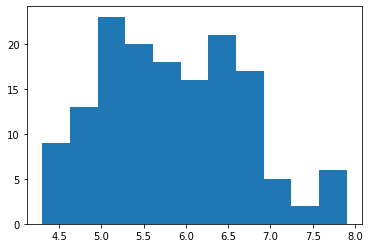

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice') # การพร็อตกราฟฮิสโตเเกรม

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

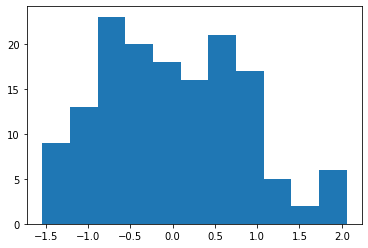

In [ ]:
plt.hist(data_matrix_m0[0,:],bins = 'rice')

In [ ]:
data_matrix_m0_std1 = data_matrix_m0/stdD.reshape((4,1))
data_matrix_m0_std1

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

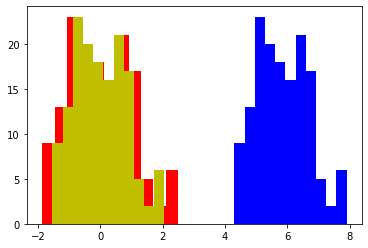

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice',color = 'b')    # วางบรรทัดไหนก่อนมันจะพล็อตก่อน
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice',color = 'r') # ข้อมูลจะกระจายมากขึ้น
plt.hist(data_matrix_m0[0,:],bins = 'rice',color = 'y')   

In [ ]:
data_matrix_m0_std1

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

## วิธีแบบเร็ว

In [ ]:
from scipy import stats# เอาไว้ใช้ในวิทยาศาสตร์ 

In [ ]:
data_matrix_m0_std1_useSTAT = stats.zscore(data_matrix,axis=1)
data_matrix_m0_std1_useSTAT    # use stat

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [ ]:
stats.zscare(data_matrix,axis)

AttributeError: ignored

(array([ 9., 13., 23., 20., 18., 16., 21., 17.,  5.,  2.,  6.]),
 array([-1.54333333, -1.21606061, -0.88878788, -0.56151515, -0.23424242,
         0.0930303 ,  0.42030303,  0.74757576,  1.07484848,  1.40212121,
         1.72939394,  2.05666667]),
 <a list of 11 Patch objects>)

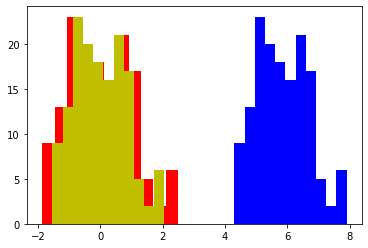

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice',color = 'b')    # วางบรรทัดไหนก่อนมันจะพล็อตก่อน
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice',color = 'r') # ข้อมูลจะกระจายมากขึ้น
plt.hist(data_matrix_m0[0,:],bins = 'rice',color = 'y')   

#2. Calculating the covariance matrix (หา Covariance matrix ของข้อมูลเรา)

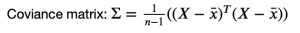

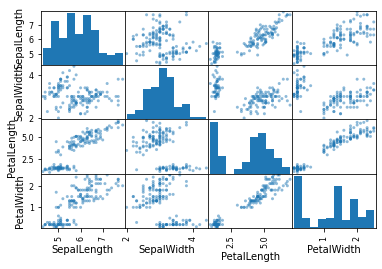

In [ ]:
pd.plotting.scatter_matrix(example_df);

In [ ]:
data_cov = np.cov(data_matrix_m0_std1) # หา cov 4*4 dimension
data_cov

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

#3. Computing the Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)

In [ ]:
eigen_values,eigen_vectors = np.linalg.eig(data_cov)

In [ ]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [ ]:
eigen_vectors  # มองเเนวคอลัมน์

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

#4. Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ eigens ที่จำเป็น)
คำนวณว่า เเต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีเเค่ไหน

In [ ]:
sum(eigen_values)

4.026845637583896

In [ ]:
variance_explained = []
for i in eigen_values:
      variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)
# อธิบายข้อมูลได้ดีกี่ % # 4 dimension

[72.77045209380132, 23.03052326768066, 3.6838319576273824, 0.5151926808906327]


In [ ]:
cumalative_variance_explained = np.cumsum(variance_explained)
print(cumalative_variance_explained)  # 2 dimension -> 95.800%

[ 72.77045209  95.80097536  99.48480732 100.        ]


In [ ]:
selected_eigen_vectors = eigen_vectors[:,:2]  # เลือก eigen vectors มา 2 คอลัมน์เเรก ->4*2
selected_eigen_vectors

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

#5. Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนเเกนใหม่)

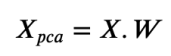

In [ ]:
X = data_matrix_m0_std1   # ตั้งdataใหม่
X.shape

(4, 150)

In [ ]:
W = selected_eigen_vectors # คูณกันยังไม่ได้ต้องนำไปปรับ
W.shape

(4, 2)

In [ ]:
X_pca = X.T.dot(W) # ข้อมูลจะเหลือ 2 dimension # นำมาดอทกัน มี 150 เหมือนเดิม
X_pca

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

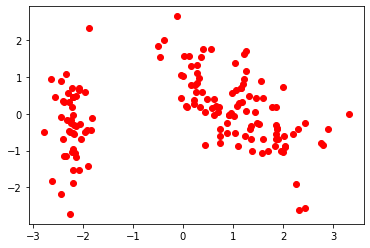

In [ ]:
plt.plot(X_pca[:,0],X_pca[:,1],'or') # ดูยาก

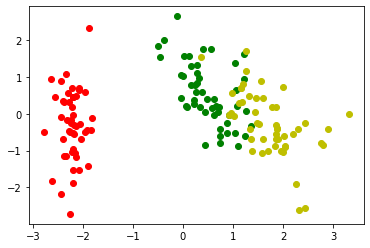

In [ ]:
plt.plot(X_pca[:50,0],X_pca[:50,1],'or')  # พร็อตเเบ่งสามพันธุ์
plt.plot(X_pca[50:100,0],X_pca[50:100,1],'og') 
plt.plot(X_pca[100:,0],X_pca[100:,1],'oy')  

# CPA

###Import

In [ ]:
from sklearn.decomposition import PCA # เป็นpackage ไว้ใช้กับ PCA

###Define

In [ ]:
pca = PCA(n_components=2) # เหลือ 2 dimension

###Fit - Transform

In [ ]:
new_pca = pca.fit_transform(X.T) ## record - เเถว , dimension - หลัก

In [ ]:
new_pca 

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

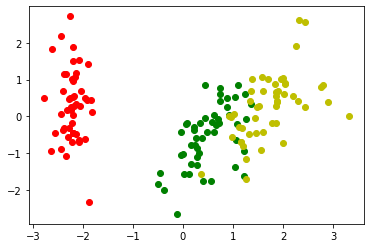

In [ ]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og') 
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')  

# Example

In [ ]:
improt pandas as pd

In [73]:
data = pd.read_csv('nndb_flat.csv')
data

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,21435,Fast Foods,"KFC,FRIED CHICK,ORIGINAL RECIPE,DRUMSTK,MEAT &...","KFC, Fried Chicken, ORIGINAL RECIPE, Drumstick...",KFC,Kentucky Fried Chicken,NaN,239.0,22.30,14.22,5.39,0.00,0.0,0.0,0.221,0.54,0.0,0.00,0.0,4.993,0.213,0.041,29.0,0.080,0.97,23.0,0.135,211.0,25.5,1.96,0.000000,0.130000,0.225000,0.0,0.000000,0.0000,0.312063,0.163846,0.034167,0.024167,0.000089,0.054762,0.301429,0.463636,0.178182
6904,21436,Fast Foods,"KFC,FRIED CHICK,ORIGINAL RECIPE,THIGH,MEAT & S...","KFC, Fried Chicken, ORIGINAL RECIPE, Thigh, me...",KFC,Kentucky Fried Chicken,NaN,269.0,18.90,17.73,8.46,0.00,0.0,15.0,0.138,0.40,0.0,0.77,0.0,5.524,0.259,0.085,64.0,0.082,0.88,22.0,0.161,230.0,23.5,1.44,0.016667,0.081176,0.166667,0.0,0.051333,0.0000,0.345250,0.199231,0.070833,0.053333,0.000091,0.052381,0.328571,0.427273,0.130909
6905,21437,Fast Foods,"KFC,FRIED CHICK,ORIGINAL RECIPE,WING,MEAT & SK...","KFC, Fried Chicken, ORIGINAL RECIPE, Wing, mea...",KFC,Kentucky Fried Chicken,NaN,297.0,21.70,18.90,9.93,0.00,0.0,14.0,0.188,0.39,0.0,0.92,0.0,6.335,0.221,0.072,77.0,0.075,0.93,24.0,0.175,250.0,27.0,1.36,0.015556,0.110588,0.162500,0.0,0.061333,0.0000,0.395937,0.170000,0.060000,0.064167,0.000083,0.057143,0.357143,0.490909,0.123636
6906,21438,Fast Foods,"KFC,FRIED CHICK,EX CRISPY,BREAST,MEAT & SKN W/...","KFC, Fried Chicken, EXTRA CRISPY, Breast, meat...",KFC,Kentucky Fried Chicken,NaN,268.0,21.24,16.55,8.47,0.00,0.0,0.0,0.309,0.32,0.0,0.00,0.0,8.139,0.107,0.043,27.0,0.400,0.57,24.0,0.144,215.0,21.9,0.78,0.000000,0.181765,0.133333,0.0,0.000000,0.0000,0.508687,0.082308,0.035833,0.022500,0.000444,0.057143,0.307143,0.398182,0.070909


## ตรวจสอบขนาดของข้อมูลว่ามีกี่ dimention

In [74]:
data.shape #จำนวนข้อมูล

(6908, 45)

## 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd703fe2e50>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

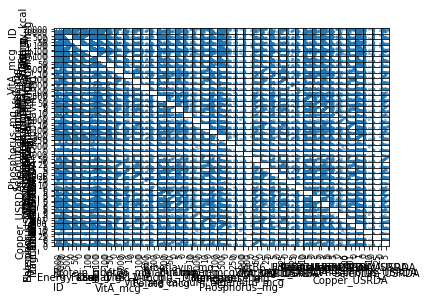

In [75]:
pd.plotting.scatter_matrix(data) #ข้อมูลเยอะเกินไปเลยซ้อนกัน

##  เนื่องจาก data มี dimention มากเกินไป เราจะทดสอบดูวา colum ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

เลือกมาทำต่าเฉพาะตัวที่มีตัวเลข

In [76]:
newdata = data.iloc[:,7:]
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


ตรวจสอบระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [77]:
import numpy as np

In [78]:
corr = np.corrcoef(newdata.to_numpy().T)

In [79]:
corr

array([[1.        , 0.16295448, 0.81068711, ...,        nan,        nan,
               nan],
       [0.16295448, 1.        , 0.07879508, ...,        nan,        nan,
               nan],
       [0.81068711, 0.07879508, 1.        , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [80]:
corr.shape

(38, 38)

In [81]:
corr

array([[1.        , 0.16295448, 0.81068711, ...,        nan,        nan,
               nan],
       [0.16295448, 1.        , 0.07879508, ...,        nan,        nan,
               nan],
       [0.81068711, 0.07879508, 1.        , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [82]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
      if (i !=j) and (corr[i,j] == 1.):
        print(f'row={i} column = {j} corrcoef = {corr[i,j]}')

In [83]:
newdata.iloc[:5,11:29]

,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA
0,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075
1,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075
2,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000
3,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900
4,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500


In [ ]:
from matplotlib import pyplot as plt

ValueError: ignored

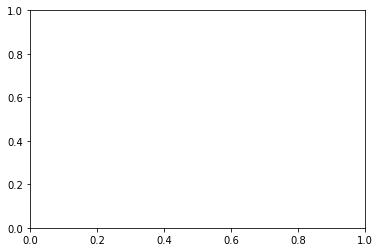

In [ ]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:28])

##ลบ column ซ้ำ

Quiz1 ลบ column ที่มีค่า correiation เป็น 1 เมื่อเทียบกับ column อื่น